In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())


Dataset Shape: (7043, 21)
First 5 rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Streami

In [ ]:
# 2. Data Cleaning
# Replace spaces with NaN
df = df.replace(" ", np.nan)

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing TotalCharges with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)



Missing values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


/var/folders/m2/xd5v2lf911315vs2981sd8j40000gn/T/ipykernel_1864/3996253012.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)



Churn Distribution:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


/var/folders/m2/xd5v2lf911315vs2981sd8j40000gn/T/ipykernel_1864/3087388583.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


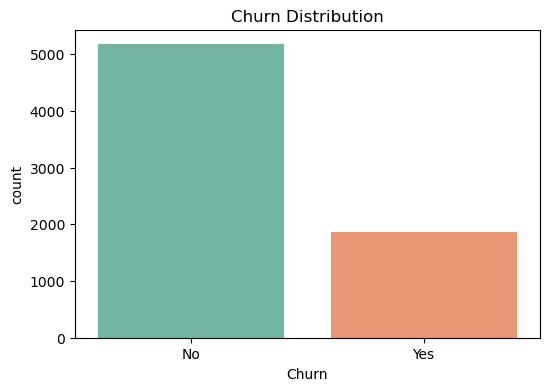

In [5]:
# 3. Basic EDA
print("\nChurn Distribution:")
print(df["Churn"].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

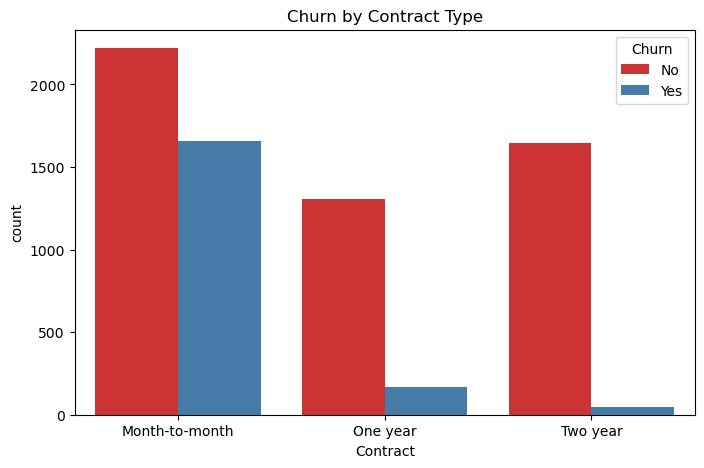

In [ ]:
# 4. Categorical Comparison

# Compare Churn with Contract Type
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set1")
plt.title("Churn by Contract Type")
plt.show()

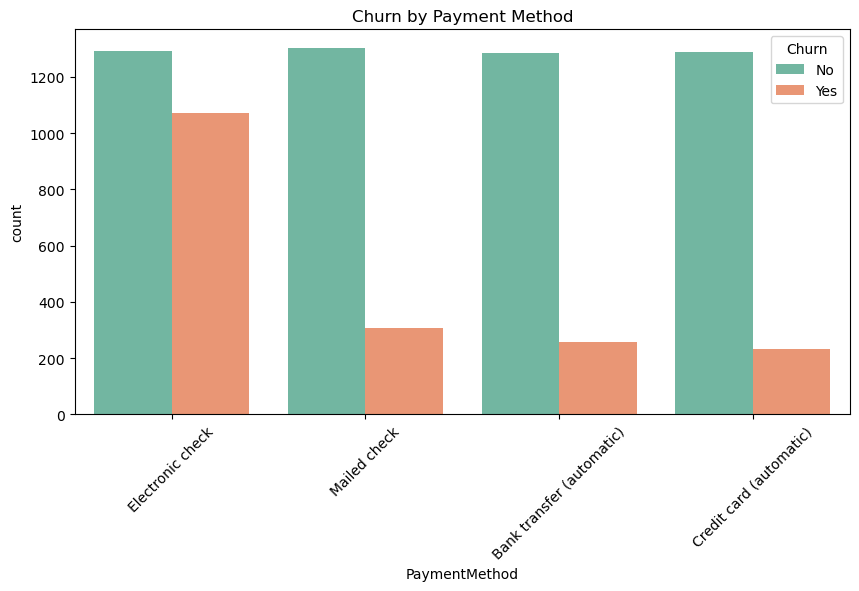

In [7]:
# Compare Churn with Payment Method
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="Set2")
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

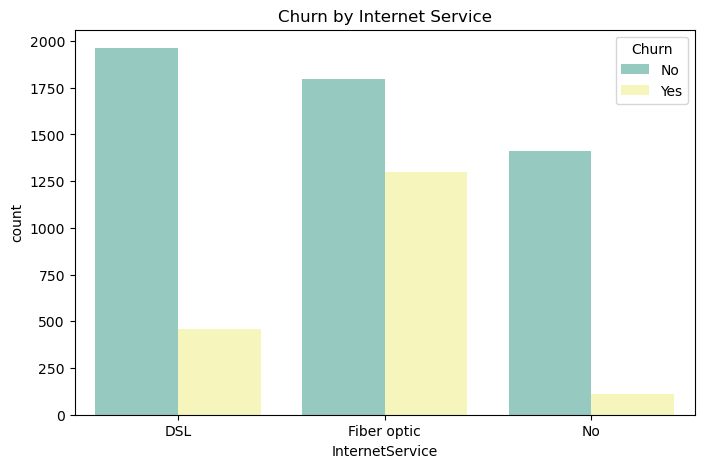

In [8]:
# Compare Churn with Internet Service
plt.figure(figsize=(8,5))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="Set3")
plt.title("Churn by Internet Service")
plt.show()


In [9]:
# 5. Pivot Tables
# -------------------------------
churn_pivot = pd.pivot_table(df, values="customerID", 
                             index="Contract", 
                             columns="Churn", 
                             aggfunc="count", 
                             fill_value=0)

print("\nChurn Pivot Table (Contract):\n", churn_pivot)


Churn Pivot Table (Contract):
 Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48



Correlation with Churn:
 ChurnBinary       1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199037
tenure           -0.352229
Name: ChurnBinary, dtype: float64


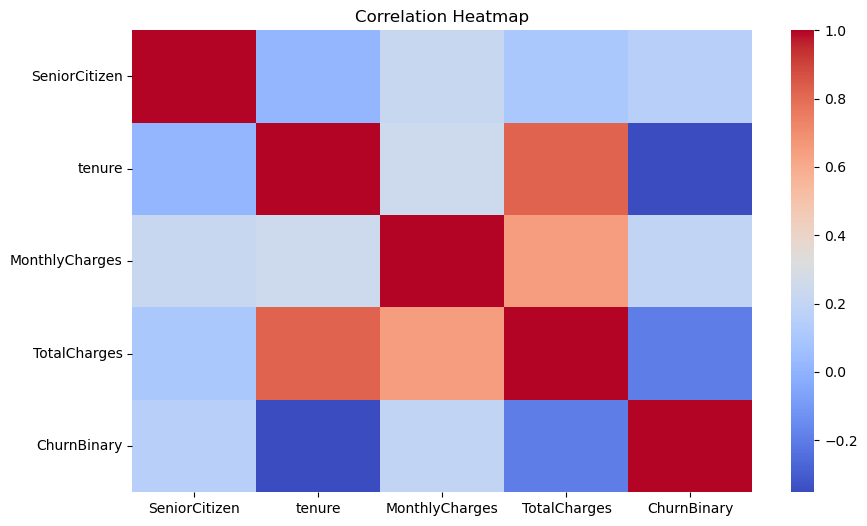

In [10]:
# 6. Correlation Analysis
# Convert Churn to binary (Yes=1, No=0)
df["ChurnBinary"] = df["Churn"].map({"Yes":1, "No":0})

# Select numeric features
numeric_features = df.select_dtypes(include=[np.number])

# Correlation with churn
correlation = numeric_features.corr()["ChurnBinary"].sort_values(ascending=False)
print("\nCorrelation with Churn:\n", correlation)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_features.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

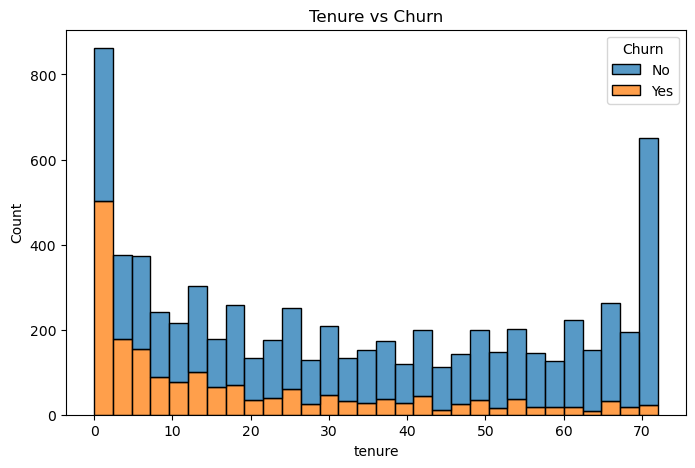

In [ ]:
# 7. Tenure and Churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30)
plt.title("Tenure vs Churn")
plt.show()

In [13]:
# 8. Detect Data Imbalance
churn_rate = df["Churn"].value_counts(normalize=True)
print("\nChurn Rate:\n", churn_rate)

if churn_rate.min() < 0.3:
    print("⚠️ Warning: Data imbalance detected! Consider resampling for ML models.")


Churn Rate:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
⚠️ Warning: Data imbalance detected! Consider resampling for ML models.
